# Maximum Validation Accuracy: 96.66%

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Rescaling
import matplotlib.pyplot as plt

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
import numpy as np

In [9]:
dataset_dir = '/kaggle/input/plant-leaf-dataset/Leaf Dataset'

In [10]:
batch_size = 16
img_height = 200
img_width = 300


In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.1,
    # color_mode='grayscale',
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.1,
    # color_mode='grayscale',
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 300 files belonging to 6 classes.
Using 270 files for training.
Found 300 files belonging to 6 classes.
Using 30 files for validation.


In [12]:
class_names = train_ds.class_names
class_names

['Basil', 'Chinar', 'Guava', 'Jamun', 'Lemon', 'Mango']

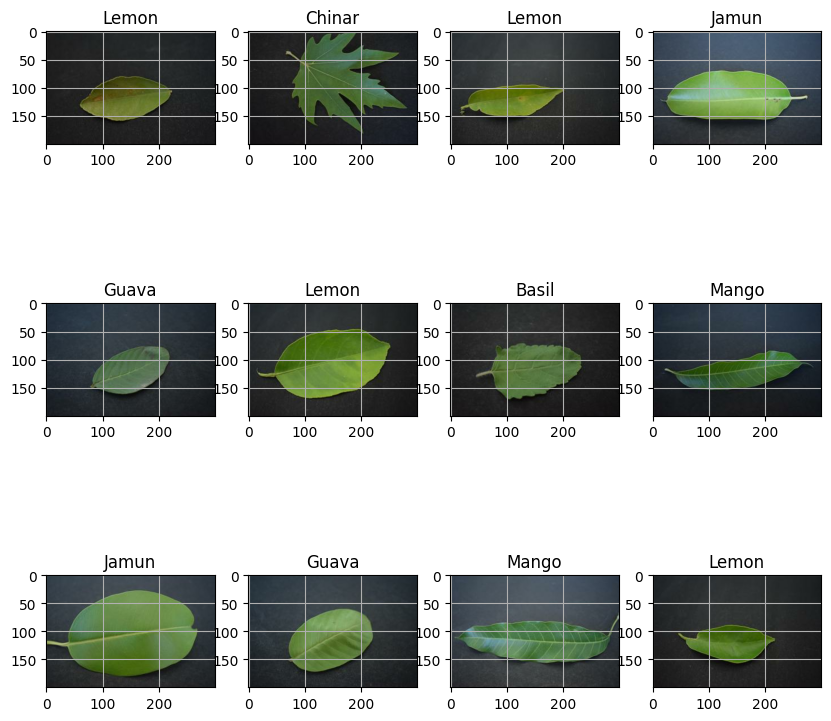

In [13]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [14]:
model = Sequential([
Rescaling(1./255, input_shape=(img_height, img_width, 3)),
Conv2D(3, 3, activation='relu'),
MaxPooling2D(),
Conv2D(3, 3, activation='relu'),
MaxPooling2D(),
# Conv2D(3, 3, activation='relu'),
# MaxPooling2D(),
# Dropout(0.2),
Flatten(),
Dense(16, activation='relu'),
Dense(16, activation='relu'),
Dense(16, activation='relu'),
Dropout(0.5),
Dense(len(class_names), activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 298, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 149, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 147, 3)     │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 73, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10512)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       168,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,022 (660.24 KB)

 Trainable params: 169,022 (660.24 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = epochs
)

Epoch 1/30
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1662 - loss: 1.7868

I0000 00:00:1742813109.010535    6364 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1742813109.024153    6364 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.1642 - loss: 1.7818

W0000 00:00:1742813111.954731    6363 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1742813112.444182    6363 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.1640 - loss: 1.7814 - val_accuracy: 0.2000 - val_loss: 1.7223
Epoch 2/30
 6/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1851 - loss: 1.7607 

W0000 00:00:1742813112.808024    6365 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2053 - loss: 1.7566 - val_accuracy: 0.2000 - val_loss: 1.6748
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2332 - loss: 1.7312 - val_accuracy: 0.2333 - val_loss: 1.5942
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2665 - loss: 1.6677 - val_accuracy: 0.3000 - val_loss: 1.4722
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3634 - loss: 1.5666 - val_accuracy: 0.4000 - val_loss: 1.4330
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3724 - loss: 1.5195 - val_accuracy: 0.5667 - val_loss: 1.2348
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4131 - loss: 1.3381 - val_accuracy: 0.6667 - val_loss: 1.1883
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4669 - loss: 1.3143 - val_accuracy: 0.6333 - val_loss: 1.1948
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4385 - loss: 1.2356 - val_accuracy: 0.7333 - val_loss: 0.

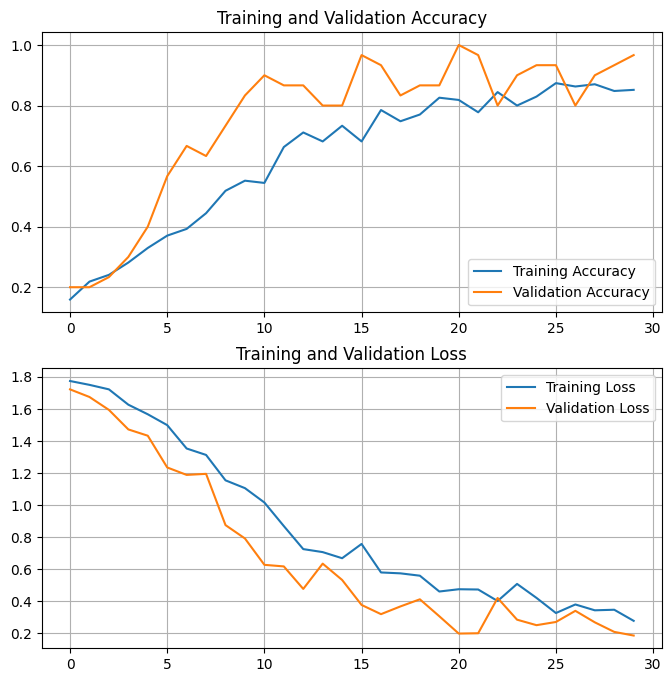

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [19]:
# Display the maximum validation accuracy
print(f"Maximum Validation Accuracy: {max(val_acc)*100:.2f}%")

Maximum Validation Accuracy: 100.00%


In [20]:
# Display the minimum validation loss
print(f"Maximum Validation Loss: {min(val_loss)*100:.2f}%")

Maximum Validation Loss: 18.53%


In [21]:
test_loss, test_acc = model.evaluate(train_ds)
print(f'Test Loss: {test_loss * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9991 - loss: 0.0410 
Test Loss: 4.74%
Test Accuracy: 99.63%


In [22]:
print(model.evaluate(val_ds))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9569 - loss: 0.1987 
[0.18528549373149872, 0.9666666388511658]


In [23]:
# import joblib

In [24]:
# joblib.dump(model, 'model.pkl')

In [25]:
# from google.colab import files
# files.download('model.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


W0000 00:00:1742813171.002424    6362 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


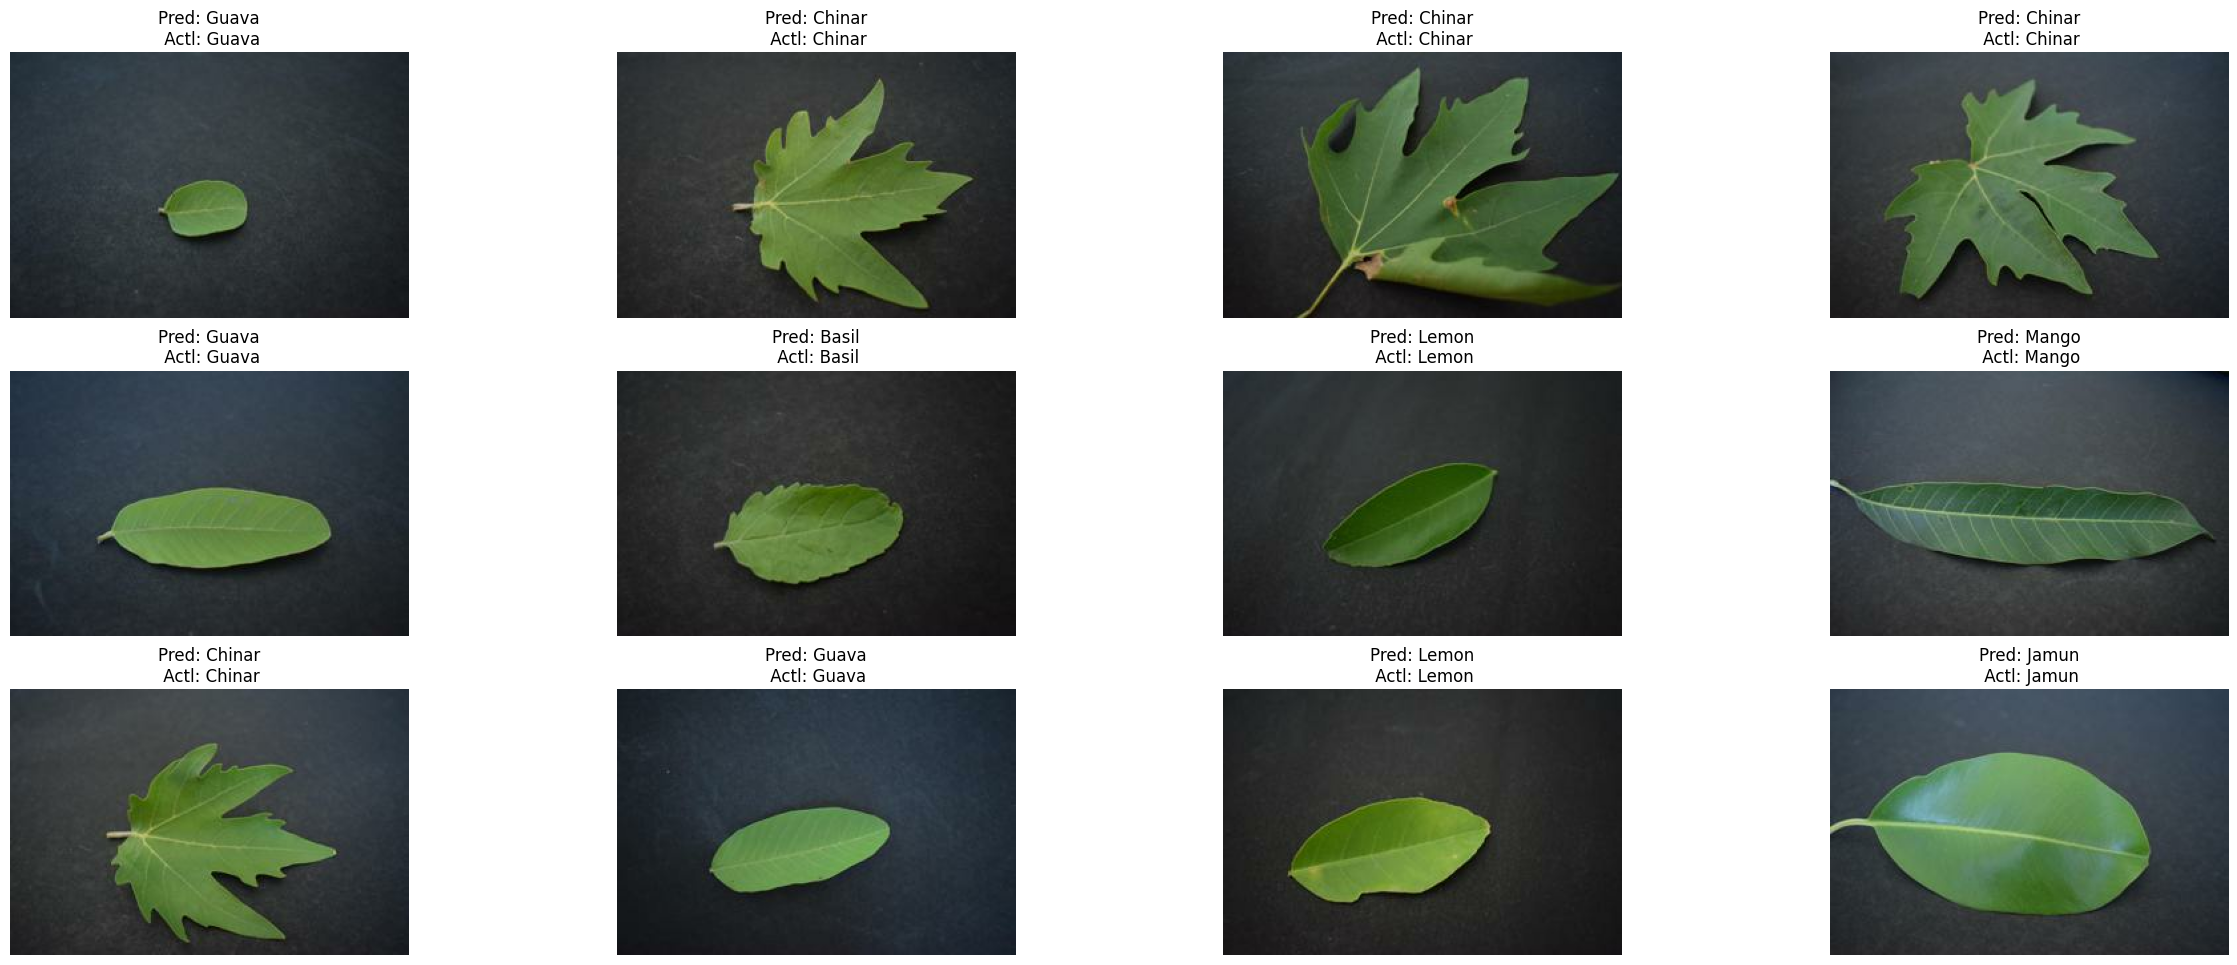

In [26]:
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(12):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i] + '\n Actl: '+ class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)

In [ ]:
# pip install pyyaml h5py  # Required to save models in HDF5 format

In [29]:
model.save('plantclassificationmodelUpdated.h5',include_optimizer=True)